In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ef1a154995881a6b9bdf69cf3b4949246c167ab22f1ad951f50ec3d6ab165f44
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


1.2352659282002645


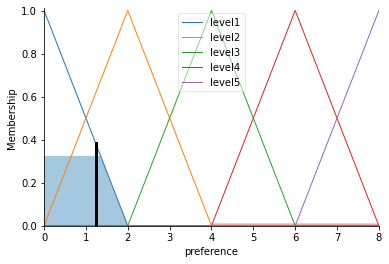

In [ ]:
#EXERCISE 2: Adaptive Food Suggestion Engine by Fuzzy Logic

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Define input and output variables
taste = ctrl.Antecedent(np.arange(0, 11, 0.25), 'taste')
environment = ctrl.Antecedent(np.arange(0, 11, 0.25), 'environment')
budget = ctrl.Antecedent(np.arange(1, 10, 0.25), 'budget')
user_review = ctrl.Antecedent(np.arange(0, 6, 0.25), 'user_review')
location = ctrl.Antecedent(np.arange(0, 4, 0.1), 'location')
preference = ctrl.Consequent(np.arange(0, 10, 2), 'preference')

# Set membership functions
taste.automf(3, names=['less', 'medium', 'high'])
environment.automf(3, names=['less', 'medium', 'high'])

budget['less preferred'] = fuzz.gaussmf(budget.universe, 1, 1)
budget['preferred'] = fuzz.gaussmf(budget.universe, 5, 1)
budget['more preferred'] = fuzz.gaussmf(budget.universe, 9, 1)

user_review['more preferred'] = fuzz.gaussmf(user_review.universe, 1.5, 1)
user_review['preferred'] = fuzz.gaussmf(user_review.universe, 3, 1)
user_review['less preferred'] = fuzz.gaussmf(user_review.universe, 4.5, 1)

location['closer'] = fuzz.gaussmf(location.universe, 0.5, 0.5)
location['near'] = fuzz.gaussmf(location.universe, 2.5, 0.5)
location['far'] = fuzz.gaussmf(location.universe, 4.5, 0.5)

preference['level1'] = fuzz.trimf(preference.universe, [0, 0, 1])
preference['level2'] = fuzz.trimf(preference.universe, [1, 2, 3])
preference['level3'] = fuzz.trimf(preference.universe, [3, 4, 5])
preference['level4'] = fuzz.trimf(preference.universe, [5, 6, 7])
preference['level5'] = fuzz.trimf(preference.universe, [7, 8, 9])

# Set rules
rule1 = ctrl.Rule(taste['high'] & environment['high'] & budget['more preferred'] & user_review['more preferred'] & location['far'], preference['level5'])
rule2 = ctrl.Rule(taste['medium'] & environment['medium'] & budget['preferred'] & user_review['preferred'] & location['near'], preference['level4'])
rule3 = ctrl.Rule(taste['less'] & environment['less'] & budget['less preferred'] & user_review['less preferred'] & location['closer'], preference['level1'])
rule4 = ctrl.Rule((taste['high'] | environment['high']) & budget['preferred'] & user_review['preferred'], preference['level3'])
rule5 = ctrl.Rule((taste['less'] | environment['less']) & budget['less preferred'] & user_review['less preferred'], preference['level1'])

# Create control system and simulate
preference_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
preference_simulation = ctrl.ControlSystemSimulation(preference_ctrl)

#Create control system and simulate
preference_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
preference_simulation = ctrl.ControlSystemSimulation(preference_ctrl)

#Pass input values to the control system
preference_simulation.input['taste'] = 3
preference_simulation.input['environment'] = 2
preference_simulation.input['budget'] = 2
preference_simulation.input['user_review'] = 3
preference_simulation.input['location'] = 1

#Compute the output
preference_simulation.compute()

#Print the result
print(preference_simulation.output['preference'])
preference.view(sim=preference_simulation)
